In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing libraries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Reading datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the dimensions of the dataframe
leads.shape

(9240, 37)

In [5]:
# Statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

In [9]:
# Converting 'Select' values in the data set as null 
leads = leads.replace('Select', np.nan)
# Calculating the percentage of na/null values in the dataset
round(100*leads.isna().sum()/len(leads),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Dropping columns with more than 40% null values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads))) >= 40):
        leads.drop(i, 1, inplace = True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [11]:
# Again checking null values percentage
round(100*leads.isna().sum()/len(leads),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
#checking value counts of Country column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [13]:
# Replacing null values in Country column with mode 'India'
leads['Country'].fillna('India', inplace = True)
#Checking sum of null values on the Country Column
leads['Country'].isna().sum()

0

In [14]:
#As we can see the Number of Values for India are quite high (nearly 96.9% of the Data)

leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

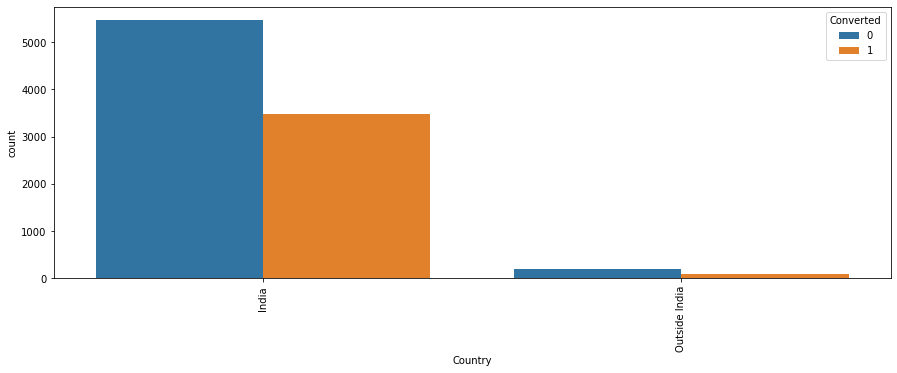

In [15]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
p1=sns.countplot(leads.Country, hue=leads.Converted)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

In [16]:
#creating a list of columns to be droppped

drop_cols=['Country']
#checking value counts of Specialization column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Specialization'>

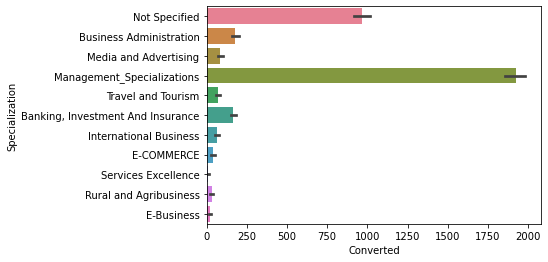

In [17]:
# Replacing null values in the Specialization column with 'Not Specified' since the specialization might not be present in the list
leads['Specialization'].fillna('Not Specified', inplace = True)
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 
#plotting spread of Specialization columnn 
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [18]:
#checking value counts of 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False) 

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='What is your current occupation'>

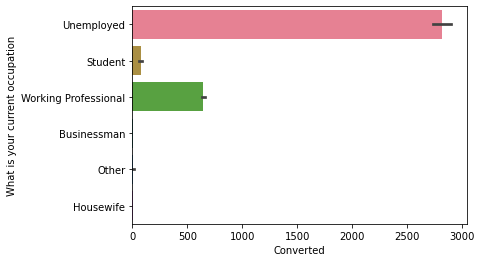

In [19]:
# Filling null values with mode i.e. 'Unemployed'
leads['What is your current occupation'].fillna('Unemployed', inplace = True)
#plotting spread of 'What is your current occupation' columnn 
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [20]:
#checking value counts of 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False) 

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# We see many people opt for a course for better career prospects, we replace the null value with the same
leads['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)
leads['What matters most to you in choosing a course'].isna().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='What matters most to you in choosing a course'>

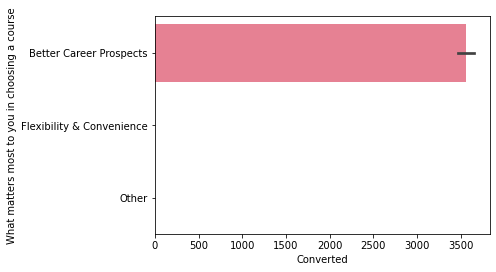

In [22]:
#plotting spread of 'What matters most to you in choosing a course' columnn 
sns.barplot(y='What matters most to you in choosing a course', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [23]:
# we have another Column that is worth Dropping. So we Append to drop_cols List
drop_cols.append('What matters most to you in choosing a course')
drop_cols

['Country', 'What matters most to you in choosing a course']

In [24]:
#checking value counts of Tags column
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [25]:
# Imputing Tags with mode
leads['Tags'].fillna('Not Specified', inplace = True)
leads['Tags'].isnull().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='Tags'>

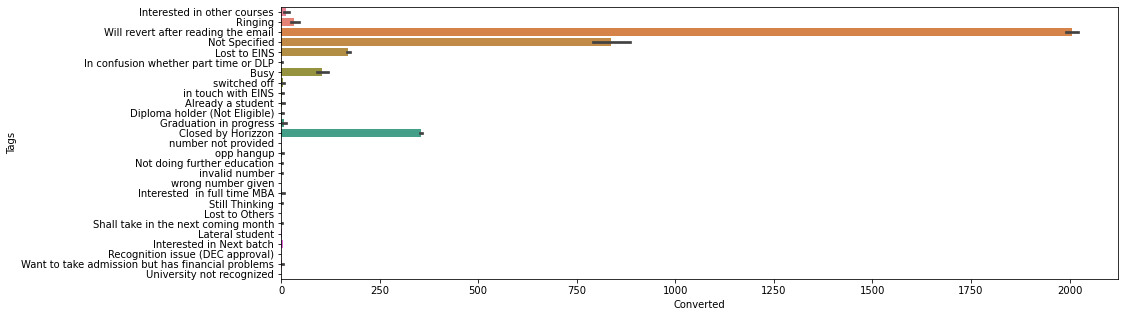

In [26]:
#plotting spread of 'Tags' columnn 
plt.figure(figsize=(15,5))
sns.barplot(y='Tags', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [27]:
#checking value counts of City column
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
# Replacing na values for city with Maharashtra
leads['City'].fillna('Mumbai', inplace = True)
leads['City'].isnull().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='City'>

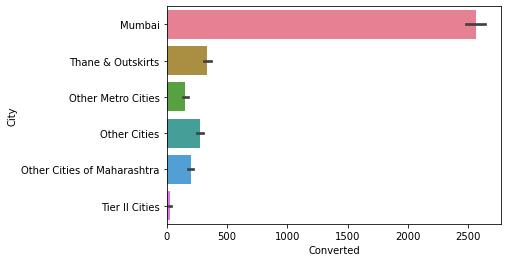

In [29]:
#plotting spread of 'City' columnn 
sns.barplot(y='City', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [30]:
round(100*leads.isna().sum()/len(leads),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [31]:
#checking value counts of Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [32]:
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')

leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
#checking value counts of Last Activity column
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [33]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')
leads['Lead Source'].fillna('Others', inplace = True)
leads['Last Activity'].fillna('Others', inplace = True)
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)
round(100*leads.isna().sum()/len(leads),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [34]:
##checking value counts of Lead Origin column Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

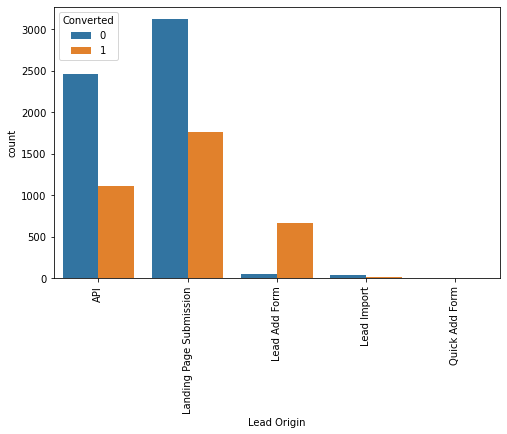

In [35]:
#visualizing count of Lead Origin based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
#checking value counts of Lead Source column
leads['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
google                 5
Live Chat              2
Name: Lead Source, dtype: int64

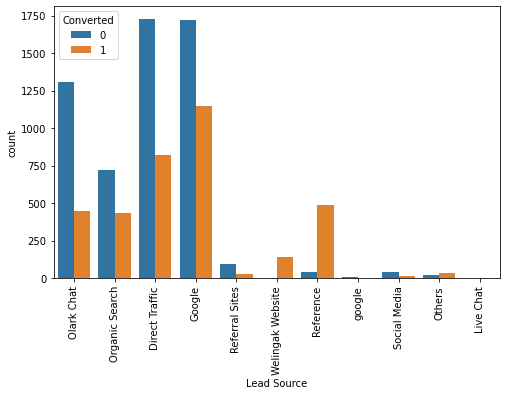

In [37]:
#visualizing count of Lead Source based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


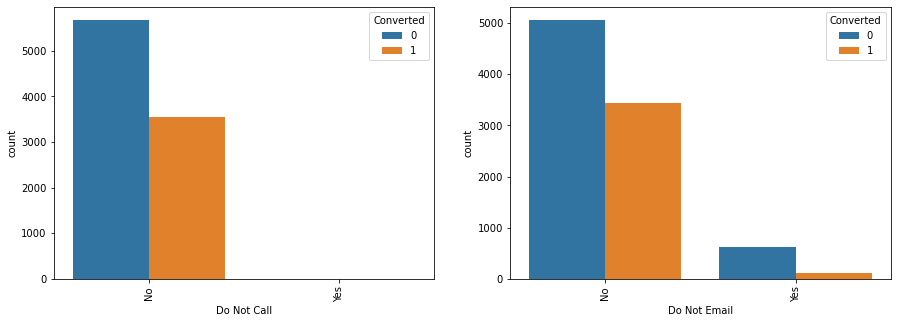

In [38]:
##visualizing count of Do Not Email & Do Not Call based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [39]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [40]:
## We Can append the Do Not Call Column to the list of Columns to be Dropped since > 95% is of only one Value
drop_cols.append('Do Not Call')
drop_cols

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [41]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [42]:
#checking value counts of Search column
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [43]:
#checking value counts of Newspaper Article column
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [44]:
#checking value counts of X Education Forums column
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [45]:
#checking value counts of Magazine column
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [46]:
#checking value counts of Digital Advertisement column
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [47]:
#checking value counts of Through Recommendations column
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [48]:
#checking value counts of Newspaper column
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [49]:
#checking value counts of Receive More Updates About Our Courses column
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [50]:
#checking value counts of Update me on Supply Chain Content column
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [51]:
#checking value counts of Get updates on DM Content column
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [52]:
#checking value counts of I agree to pay the amount through cheque column
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [53]:
#checking value counts of A free copy of Mastering The Interview column
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [54]:
#adding imbalanced columns to the list of columns to be dropped

drop_cols.extend(['Search','Newspaper Article','X Education Forums','Magazine','Digital Advertisement','Through Recommendations',
                     'Newspaper','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                     'I agree to pay the amount through cheque'])
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [55]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')
#checking value counts for Last Notable Activity

leads['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

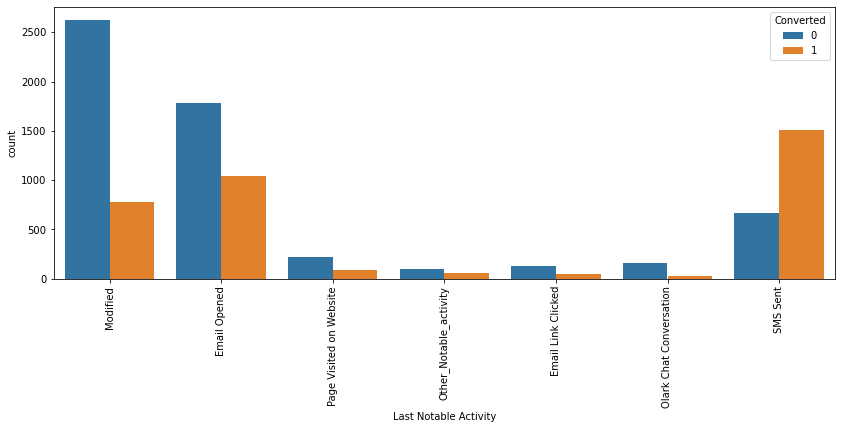

In [56]:
#visualizing count of Last Notable Activity based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [57]:
#list of columns to be dropped
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Magazine',
 'Digital Advertisement',
 'Through Recommendations',
 'Newspaper',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [58]:
#dropping columns
leads = leads.drop(drop_cols,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

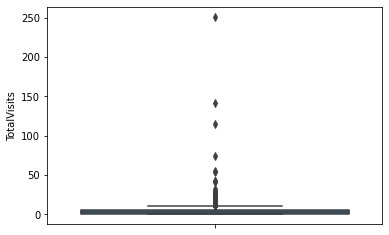

In [59]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [60]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

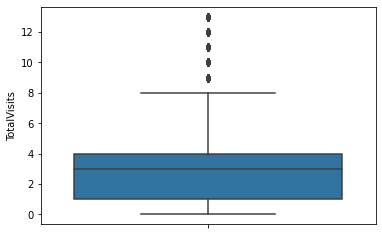

In [61]:
#Outlier Treatment: Remove top & bottom 2% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.98)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.02)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

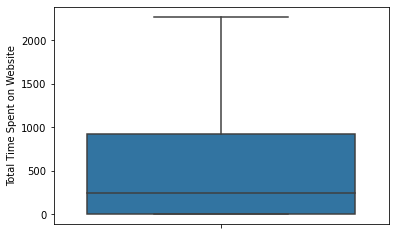

In [62]:
#Total Time Spent on Website
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

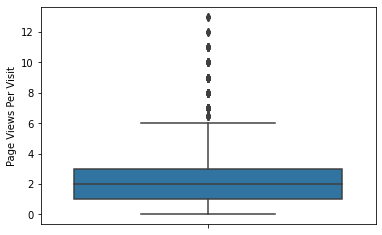

In [63]:
#Page Views Per Visit
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [64]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    9066.000000
mean        2.298612
std         1.979081
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

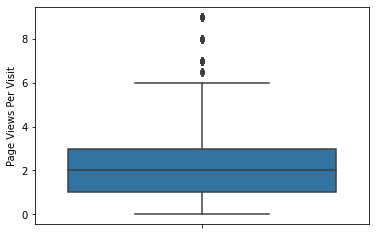

In [65]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [66]:
leads.shape

(9015, 16)

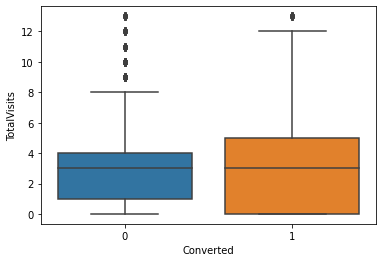

In [67]:
#checking "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

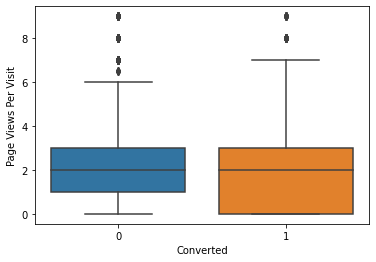

In [68]:
#checking "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

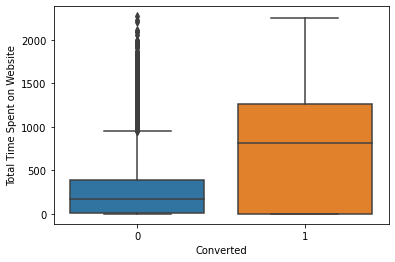

In [69]:
#checking "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

In [70]:
## Correlation Matrix

cor = leads.corr()
cor

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.026670,0.052300,0.021346,0.060879
Converted,0.026670,1.000000,0.043805,0.358538,-0.007357
TotalVisits,0.052300,0.043805,1.000000,0.355323,0.756926
Total Time Spent on Website,0.021346,0.358538,0.355323,1.000000,0.346034
Page Views Per Visit,0.060879,-0.007357,0.756926,0.346034,1.000000


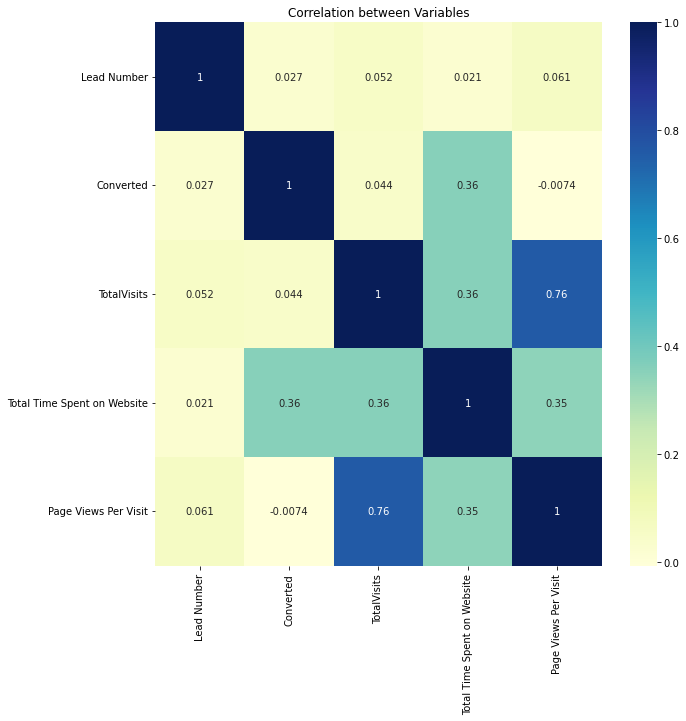

In [71]:
#Checking correlations of numeric values
## heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title("Correlation between Variables")
plt.show()

In [72]:
leads.shape

(9015, 16)

In [73]:
#list of categorical columns

categorical_cols= leads.select_dtypes(include=['object']).columns
categorical_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [74]:
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,No,Other_Notable_activity
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,wrong number given,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,invalid number,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,Not Specified,Other Metro Cities,No,SMS Sent


In [75]:
var_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[var_list] = leads[var_list].apply(binary_map)
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)
leads.shape

(9015, 30)

In [76]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)
#dropping original columns

leads.drop(categorical_cols,1,inplace = True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
from sklearn.model_selection import train_test_split

y = leads['Converted']
X=leads.drop('Converted', axis=1)
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6804,-0.840425,-0.016875,-0.785601,-0.404001,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6592,-0.772027,-0.016875,0.106052,-0.404001,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4921,-0.189412,-0.390500,-0.572778,-0.135630,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9224,-1.606683,0.356749,-0.049896,0.937854,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5678,-0.459315,-0.016875,-0.229694,0.401112,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=18)    
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 4),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 4),
 ('What is your current occupation_Housewife', False, 3),
 ('What is your current occupation_Other', False, 4),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', False, 3),
 ('City_Other Cities', False, 4),
 ('City_Other Cities of Maharashtra', False, 3),
 ('City_Other Metro Cities', False, 4),
 ('City_Thane & Outskirts', False, 4),
 ('City_Tier II Cities', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number

In [83]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_google', 'Tags_In confusion whether part time or DLP',
       'Tags_Interested in Nex

In [84]:
import statsmodels.api as sm
# Logistic regression model

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.5
Date:                Mon, 27 Feb 2023   Deviance:                       2355.1
Time:                        20:16:29   Pearson chi2:                 1.31e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6158
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1019      0.381      0.268      0.789      -0.645       0.849
Total Time Spent on Website                                1.0804      0.063     17.019      0.000       0.956       1.205
Lead Origin_Landing Page Submission                       -0.5640      0.154     -3.662      0.000      -0.866      -0.262
Lead Origin_Lead Add Form                                  2.3698      0.774      3.064      0.002       0.854       3.886
What is your current occupation_Unemployed                -0.8602      0.310     -2.778      0.005      -1.467      -0.253
City_Tier II Cities                                        0.8683      0.609      1.426      0.154      -0.325       2.062
Specialization_Banking, Investment And Insurance           0.4869      0.302      1.613      0.107      -0.105       1.078
Specialization_Travel and Tourism                         -0.6537      0.451     -1.449      0.147      -1.538       0.230
Lead Source_Direct Traffic                                -1.0966      0.223     -4.916      0.000      -1.534      -0.659
Lead Source_Google                                        -0.8839      0.180     -4.899      0.000      -1.238      -0.530
Lead Source_Organic Search                                -1.0438      0.225     -4.641      0.000      -1.485      -0.603
Lead Source_Reference                                     -2.7978      0.854     -3.276      0.001      -4.472      -1.124
Lead Source_Referral Sites                                -1.0936      0.506     -2.160      0.031      -2.086      -0.101
Lead Source_Welingak Website                               2.1200      1.056      2.008      0.045       0.051       4.189
Tags_Already a student                                    -3.5642      0.737     -4.833      0.000      -5.010      -2.119
Tags_Busy                                                  0.8344      0.234      3.567      0.000       0.376       1.293
Tags_Closed by Horizzon                                    6.7386      0.750      8.986      0.000       5.269       8.208
Tags_Diploma holder (Not Eligible)                        -2.9603      1.102     -2.686      0.007      -5.121      -0.800
Tags_Graduation in progress                               -0.6914      0.517     -1.336      0.181      -1.706       0.323
Tags_Interested  in full time MBA                         -1.6824      0.657     -2.559      0.010      -2.971      -0.394
Tags_Interested in other courses                          -2.1141      0.418     -5.053      0.000      -2.934      -1.294
Tags_Lateral student                                      26.6908   1.18e+05      0.000      1.000   -2.31e+05    2.31e+05
Tags_Los

In [85]:
col = col.drop('Lead Source_Welingak Website',1)
# Logistic regression model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1179.7
Date:                Mon, 27 Feb 2023   Deviance:                       2359.3
Time:                        20:16:30   Pearson chi2:                 1.37e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6155
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1239      0.381      0.325      0.745      -0.623       0.871
Total Time Spent on Website                                1.0808      0.064     17.005      0.000       0.956       1.205
Lead Origin_Landing Page Submission                       -0.5628      0.154     -3.653      0.000      -0.865      -0.261
Lead Origin_Lead Add Form                                  3.7283      0.480      7.773      0.000       2.788       4.668
What is your current occupation_Unemployed                -0.8629      0.310     -2.780      0.005      -1.471      -0.255
City_Tier II Cities                                        0.8914      0.610      1.462      0.144      -0.304       2.087
Specialization_Banking, Investment And Insurance           0.4851      0.302      1.606      0.108      -0.107       1.077
Specialization_Travel and Tourism                         -0.6494      0.451     -1.439      0.150      -1.534       0.235
Lead Source_Direct Traffic                                -1.0966      0.223     -4.913      0.000      -1.534      -0.659
Lead Source_Google                                        -0.8848      0.181     -4.901      0.000      -1.239      -0.531
Lead Source_Organic Search                                -1.0428      0.225     -4.635      0.000      -1.484      -0.602
Lead Source_Reference                                     -4.1538      0.603     -6.888      0.000      -5.336      -2.972
Lead Source_Referral Sites                                -1.0982      0.506     -2.168      0.030      -2.091      -0.105
Tags_Already a student                                    -3.5707      0.738     -4.841      0.000      -5.016      -2.125
Tags_Busy                                                  0.8303      0.234      3.551      0.000       0.372       1.289
Tags_Closed by Horizzon                                    6.7471      0.750      8.997      0.000       5.277       8.217
Tags_Diploma holder (Not Eligible)                        -2.9634      1.102     -2.689      0.007      -5.124      -0.803
Tags_Graduation in progress                               -0.6917      0.517     -1.337      0.181      -1.706       0.322
Tags_Interested  in full time MBA                         -1.6848      0.658     -2.561      0.010      -2.974      -0.395
Tags_Interested in other courses                          -2.1126      0.419     -5.047      0.000      -2.933      -1.292
Tags_Lateral student                                      26.6875   1.18e+05      0.000      1.000   -2.31e+05    2.31e+05
Tags_Lost to EINS                                          5.6192      0.536     10.484      0.000       4.569       6.670
Tags_Not

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.39
37,Last Notable Activity_SMS Sent,7.14
33,Last Activity_SMS Sent,6.89
1,Lead Origin_Landing Page Submission,4.72
7,Lead Source_Direct Traffic,4.68
2,Lead Origin_Lead Add Form,4.38
10,Lead Source_Reference,4.08
8,Lead Source_Google,3.64
35,Last Notable Activity_Modified,3.50
31,Last Activity_Email Opened,3.18


In [87]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6804    0.037418
6592    0.819121
4921    0.052537
9224    0.004360
5678    0.042788
7919    0.827465
4719    0.528206
5806    0.987537
874     0.990150
7954    0.026188
dtype: float64

In [88]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03741798, 0.81912144, 0.05253654, 0.00435999, 0.04278785,
       0.82746505, 0.52820648, 0.98753677, 0.99015006, 0.02618784])

In [89]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.037418,6804
1,0,0.819121,6592
2,0,0.052537,4921
3,0,0.004360,9224
4,0,0.042788,5678


In [90]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.037418,6804,0
1,0,0.819121,6592,1
2,0,0.052537,4921,0
3,0,0.004360,9224,0
4,0,0.042788,5678,0


In [91]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3740  162]
 [ 265 2143]]


In [92]:
# Predicted       not_converted    Converted
# Actual
# not_converted        3741          161
# Converted            292          2116 
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9323296354992076


In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8899501661129569

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.9584828293182983

In [95]:
# Calculate false postive rate - predicting Converted when lead does not have converted
print(FP/ float(TN+FP))

0.041517170681701694


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.9297180043383948


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9338327091136079


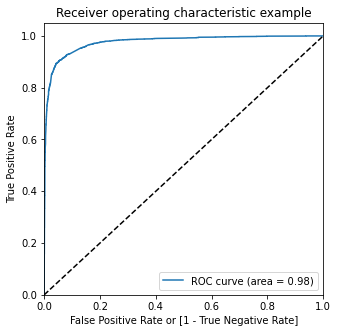

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [99]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.037418,6804,0,1,0,0,0,0,0,0,0,0,0
1,0,0.819121,6592,1,1,1,1,1,1,1,1,1,1,0
2,0,0.052537,4921,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004360,9224,0,1,0,0,0,0,0,0,0,0,0
4,0,0.042788,5678,0,1,0,0,0,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381616  1.000000  0.000000
0.1   0.1  0.863391  0.976744  0.793439
0.2   0.2  0.900792  0.953073  0.868529
0.3   0.3  0.923613  0.918605  0.926704
0.4   0.4  0.929952  0.905316  0.945156
0.5   0.5  0.932330  0.889950  0.958483
0.6   0.6  0.929002  0.868355  0.966427
0.7   0.7  0.925832  0.846761  0.974628
0.8   0.8  0.909984  0.791944  0.982829
0.9   0.9  0.890650  0.729651  0.990005


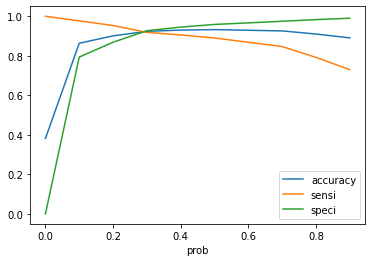

In [101]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.037418,6804,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.819121,6592,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.052537,4921,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004360,9224,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.042788,5678,0,1,0,0,0,0,0,0,0,0,0,0


In [103]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9236133122028526

In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3616,  286],
       [ 196, 2212]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9186046511627907

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.9267042542286007

In [107]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07329574577139929


In [108]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8855084067253803


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9485834207764953


In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3616,  286],
       [ 196, 2212]], dtype=int64)

In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8855084067253803

In [112]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9186046511627907

In [113]:
from sklearn.metrics import precision_score, recall_score
?precision_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8855084067253803

In [114]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9186046511627907

In [115]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6305    0
 6306    1
 6307    0
 6308    0
 6309    0
 Name: Converted, Length: 6310, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6305    0
 6306    1
 6307    0
 6308    0
 6309    0
 Name: final_predicted, Length: 6310, dtype: int64)

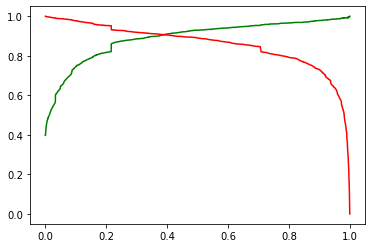

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()


,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2781,0.663497,-1.142465,-0.873896,-1.178596,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8231,-1.274242,0.744667,-0.817464,1.446765,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1721,1.072981,0.744667,1.782067,1.446765,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5226,-0.318470,-0.387612,-0.791978,-0.128452,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4912,-0.185933,-0.010186,-0.236756,0.396621,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [118]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Unemployed,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,...,Tags_switched off,Tags_wrong number given,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
2781,-0.873896,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8231,-0.817464,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1721,1.782067,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5226,-0.791978,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4912,-0.236756,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [119]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2781    8.682990e-02
8231    1.370001e-02
1721    9.872042e-01
5226    1.938225e-02
4912    1.575818e-03
8301    4.985424e-02
8257    9.914275e-01
707     2.101837e-12
4383    1.182704e-03
1803    9.975960e-01
dtype: float64

In [120]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
2781,0.086830
8231,0.013700
1721,0.987204
5226,0.019382
4912,0.001576


In [121]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2781,0.086830
1,0,8231,0.013700
2,1,1721,0.987204
3,0,5226,0.019382
4,0,4912,0.001576


In [122]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2781,0,0.086830,9,0
1,8231,0,0.013700,1,0
2,1721,1,0.987204,99,1
3,5226,0,0.019382,2,0
4,4912,0,0.001576,0,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9271719038817006

In [124]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1539,  112],
       [  85,  969]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9193548387096774

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.9321623258631133

In [127]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8963922294172063

In [128]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9193548387096774